In [196]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from keras import Sequential
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [197]:
df=pd.read_csv('winequality-red.csv')

In [198]:
df.isna().sum() if (df.isna().sum()).any()>0 else "Data is Clean"

'Data is Clean'

In [291]:
df['quality'].mean()

5.6360225140712945

In [199]:
train_dataset = df.sample(frac=0.8,random_state=0)
test_dataset = df.drop(train_dataset.index)

In [200]:
train_labels = train_dataset.pop('quality')
test_labels = test_dataset.pop('quality')

In [201]:
normed_train_data = normalize(train_dataset)
normed_test_data = normalize(test_dataset)

In [202]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
  ])

  #optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer='adam',
                metrics=['mae', 'mse'])
  return model

In [203]:
model = build_model()

In [204]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:29.9155,  mae:5.4056,  mse:29.9155,  val_loss:25.0164,  val_mae:4.9294,  val_mse:25.0164,  
....................................................................................................
Epoch: 100, loss:0.4381,  mae:0.5290,  mse:0.4381,  val_loss:0.5164,  val_mae:0.5539,  val_mse:0.5164,  
....................................................................................................
Epoch: 200, loss:0.4125,  mae:0.5103,  mse:0.4125,  val_loss:0.4864,  val_mae:0.5367,  val_mse:0.4864,  
....................................................................................................
Epoch: 300, loss:0.4017,  mae:0.5034,  mse:0.4017,  val_loss:0.4679,  val_mae:0.5248,  val_mse:0.4679,  
....................................................................................................
Epoch: 400, loss:0.3856,  mae:0.4917,  mse:0.3856,  val_loss:0.4836,  val_mae:0.5158,  val_mse:0.4836,  
....................................................................

In [205]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Quality]')

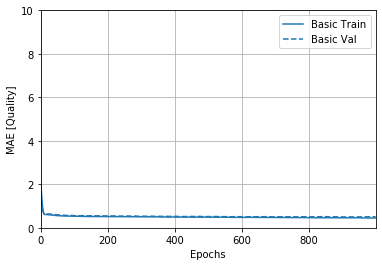

In [206]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Quality]')

In [186]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:29.0468,  mae:5.3231,  mse:29.0468,  val_loss:22.4872,  val_mae:4.6656,  val_mse:22.4872,  
....................................................................................................
Epoch: 100, loss:0.4343,  mae:0.5188,  mse:0.4343,  val_loss:0.5241,  val_mae:0.5704,  val_mse:0.5241,  
....................................................................................................
Epoch: 200, loss:0.4167,  mae:0.5091,  mse:0.4167,  val_loss:0.5101,  val_mae:0.5606,  val_mse:0.5101,  
...........................................

In [187]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Quality]')

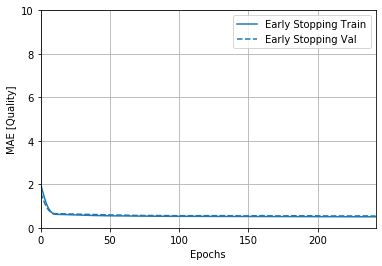

In [188]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [Quality]')

In [207]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
print("Testing set Mean Abs Error: {:5.2f} ".format(mae))

320/320 - 0s - loss: 0.4025 - mae: 0.4960 - mse: 0.4025
Testing set Mean Abs Error:  0.50 


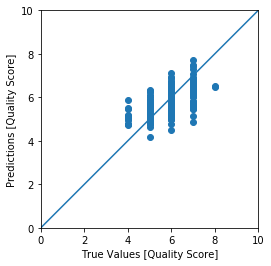

In [208]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Quality Score]')
plt.ylabel('Predictions [Quality Score]')
lims = [0, 10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [266]:
test_predictions.min()

4.1540046

In [267]:
test_predictions.mean()

5.5735054

In [268]:
test_predictions.max()

7.731328

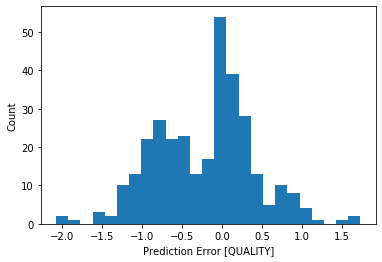

In [195]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [QUALITY]")
_ = plt.ylabel("Count")

In [359]:
new_pred = model.predict(normalize(np.array([[7.4 , 1.185,0 , 4.25 , 0.0969999999999999 , 5 , 14 , 0.9966 , 3.63 , 0.54 , 10.7]])))

In [360]:
new_pred.flatten()[0]

3.682913

In [350]:
threshold=5

In [351]:
final_pred=new_pred.flatten()[0]*(df['quality'].max()/test_predictions.max()) if new_pred.flatten()[0]>threshold else new_pred.flatten()[0]*(df['quality'].min()/test_predictions.min()+0.1)
final_pred

7.7480354044740976